 ## Proyecto de presentacion de Inteligencia Artificial

<u>Nombre del Estudiante </u> :  José Araya Prohens     

<u>Rut </u> :  20.444.205 - 3

<u>**Mi tema**</u>:         
Recomendaciones de animes de la plataforma de streaming crunchyroll    

<u>**Mi csv**</u>: 
 Es un dataset de los shows disponibles en la plataforma de streaming de pago llamado crunchyroll , este dataset posee más de 1000 filas de datos , estos datos fueron adqueridos del servicio en mayo 2022 de Estados Unidos       [fuente de Kaggle](https://www.kaggle.com/datasets/victorsoeiro/crunchyroll-animes-and-movies?select=titles.csv)     

<u>**Mi propuesta**</u>:    
Analizar los datos de manera que puedas predecir un tiulo recomendado a partir de un genero que te gusta o un titulo que ya viste.  

<u>**Modelo que se piensa implementar**</u>: 
 Arboles de Decision   
    
<u>**Objetivo** </u> :           




### Imports

In [129]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from rich import print
from rich import pretty
pretty.install()
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


### Instrucciones del profesor
Estimado alumnos:

Este es un recordatorio para el trabajo de presentacion.

CONDICIONES:
Basado en la busqueda personal anunciada en clases de un dataset a su interes. Debe generar un estudio sobre dicho
dataset. El estudio es de caracter indagatorio, en el cual se evaluaran las siguientes cosas:

1. Uso y manejo de las herramientas de manipulacion de datos (DataFrame) (10%)
2. Propuesta y desarrollo de indicadores estadisticos con algun fin que estime pertinente (20%)
3. Muestra de graficos (con matplotlib BIEN HECHOS) , con el fin de plantear alguna problematica/propuesta u otro, el cual le parece adecuado mostrar. (30%)
4. Uso de algun modelo predictivo aprendido durante el curos, sea, KMeans, algun regresor linea o arboles (otros modelos que usted estudie, son permitidos)(30%)
5. Muestra de resultados, y analisis del modelo encontrando, con foco en su precision predictiva y overfit (si applica) (10%)
NOTA:
Recuerde que puede usar cualquer recurso mostrado en el curso, si usa otro modelo, debe explicar el nuevo modelo. Si
considera necesario usar PCA, HAGALO!

El Profe!

In [130]:
titulos = pd.read_csv("csv/titles.csv")
creditos = pd.read_csv("csv/credits.csv")

primero vamos a definir que variables importan para este trabajo

In [131]:
titulos = titulos[['title','type','description','release_year','age_certification','runtime','genres','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]
titulos['genres'] = titulos['genres'].str.replace('[','',regex=True).replace(']','',regex=True).replace("'",'',regex=True)
titulos.head()

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Lupin the Third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.9,2116.0,45.829,8.0
1,Mobile Suit Gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"scifi, war, animation, action, drama, fantasy",1.0,7.9,2281.0,41.250,8.1
2,Galaxy Express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"scifi, action, drama, animation",1.0,7.8,459.0,5.064,8.3
3,Lupin the 3rd,SHOW,The master thief Lupin III and his cronies con...,1977,TV-14,24,"scifi, animation, action, comedy, crime, fantasy",4.0,8.0,1738.0,0.600,NaN
4,Chōdenji Machine Voltes V,SHOW,Chōdenji Machine Voltes V is a Japanese anime ...,1977,TV-PG,24,"drama, action, scifi, animation",1.0,8.1,207.0,12.625,7.3


In [132]:
titulos.shape

(1081, 12)

tenemos 1081 filas de datos 

In [133]:
unique_genres = [val.strip() for sublist in titulos.genres.dropna().str.split(",").tolist() for val in sublist]

In [134]:
genres_summary = pd.DataFrame(unique_genres,columns=['genres']).value_counts().reset_index().rename(columns={0:'count'})
#Eliminamos la categoria animacion y la categoria vacia ya que estas no son importantes a la hora de graficarlo
genres_summary = genres_summary.drop(0) 
genres_summary = genres_summary.drop(15) 

In [135]:
genres_summary

,genres,count
1,comedy,567
2,scifi,472
3,action,463
4,drama,395
5,fantasy,353
6,romance,253
7,thriller,90
8,sport,55
9,horror,49
10,family,35


grafica de la cantidad de animes que tiene cada genero en la plataforma de crunchyroll

<AxesSubplot:xlabel='count', ylabel='genres'>

<Figure size 640x480 with 1 Axes>

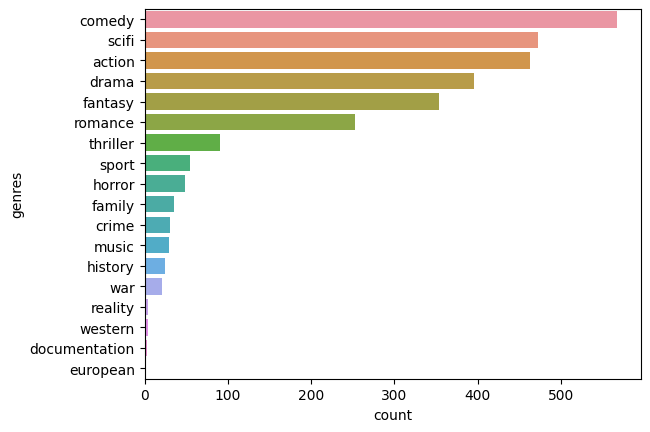

In [137]:
ax = sns.barplot(x="count", y="genres", data=genres_summary)
ax
